In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score
from sklearn.decomposition import PCA

## LD=2

Loading data.

In [2]:
ld2_ligsio2 = np.load('../classification/ld2_ligsio2_all.npy')
ld2_ligcl = np.load('../classification/ld2_ligcl_all.npy')
ld2_ausio2 = np.load('../classification/ld2_ausio2_all.npy')
ld2_auau = np.load('../classification/ld2_auau_all.npy')

Stacking the data together and labeling the datasets.

In [3]:
ld2 = np.concatenate([ld2_ligsio2, ld2_ligcl, ld2_ausio2, ld2_auau], axis=0)

ld2_labels = (
    ['ligsio2'] * len(ld2_ligsio2) +
    ['ligcl']   * len(ld2_ligcl) +
    ['ausio2']  * len(ld2_ausio2) +
    ['auau']    * len(ld2_auau)
)

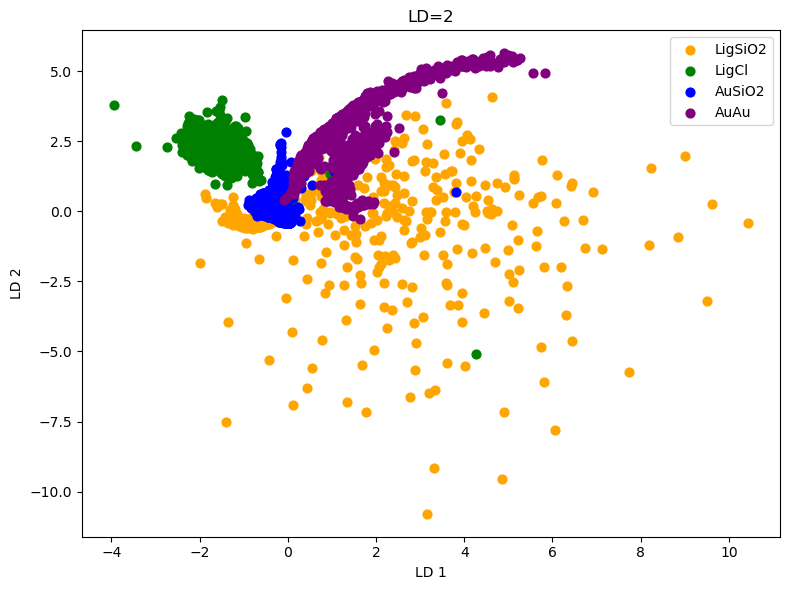

In [4]:
colors = ['orange', 'green', 'blue', 'purple']
labels = ['LigSiO2', 'LigCl', 'AuSiO2', 'AuAu']

plt.figure(figsize=(8, 6))
start = 0
for i, (data, label, color) in enumerate(zip(
    [ld2_ligsio2, ld2_ligcl, ld2_ausio2, ld2_auau],
    labels,
    colors
)):
    plt.scatter(data[:, 0], data[:, 1], label=label, s=40, color=color)
plt.legend()
plt.title("LD=2")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.tight_layout()
plt.show()

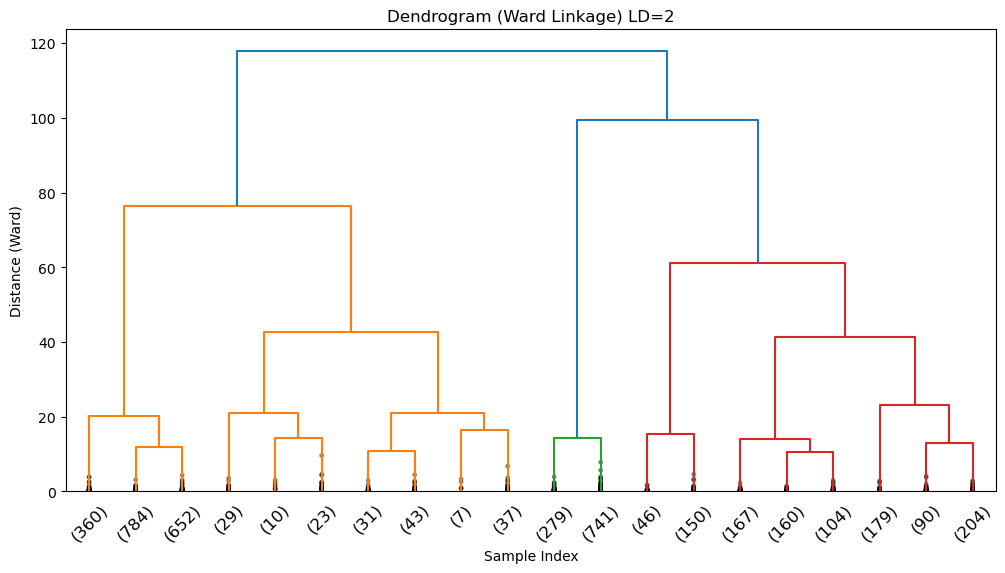

In [5]:
linked_ld2 = linkage(ld2, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    linked_ld2, 
    truncate_mode='lastp',  
    p=20,                  
    leaf_rotation=45.,
    leaf_font_size=12.,
    show_contracted=True
)
plt.title('Dendrogram (Ward Linkage) LD=2')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.show()

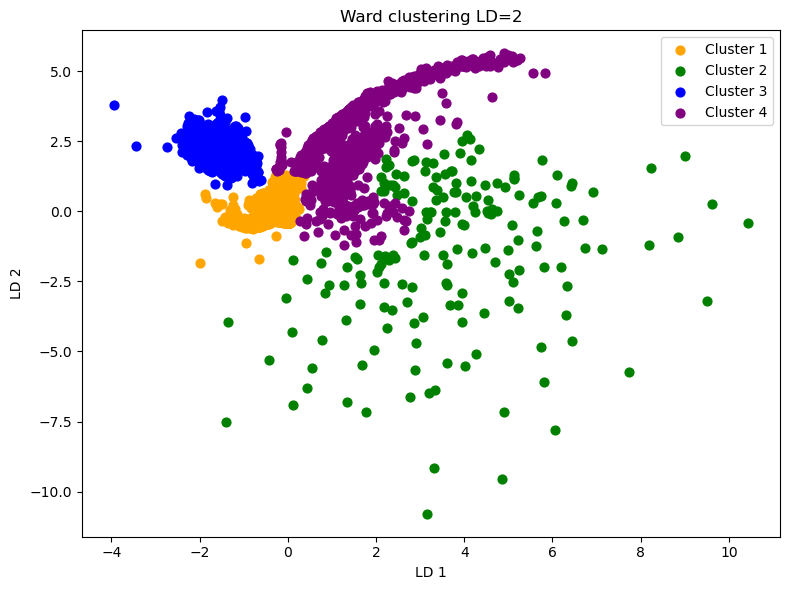

In [6]:
cluster_labels_ld2 = fcluster(linked_ld2, t=4, criterion='maxclust')

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels_ld2):
    mask = (cluster_labels_ld2 == cluster_id)
    plt.scatter(ld2[mask, 0], ld2[mask, 1], label=f"Cluster {cluster_id}", s=40, c=colors[cluster_id - 1])
plt.legend()
plt.title("Ward clustering LD=2")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.tight_layout()
plt.show()

In [7]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(ld2_labels)

cluster_encoder = LabelEncoder()
cluster_labels_num = cluster_encoder.fit_transform(cluster_labels_ld2)

ari = adjusted_rand_score(y_true_encoded, cluster_labels_ld2)
hom = homogeneity_score(y_true_encoded, cluster_labels_ld2)
comp = completeness_score(y_true_encoded, cluster_labels_ld2)

print(f"Ajusted Rand Index (ARI): {ari:.3f}")
print(f"Homogeneinity: {hom:.3f}")
print(f"Completeness: {comp:.3f}")

Ajusted Rand Index (ARI): 0.643
Homogeneinity: 0.672
Completeness: 0.777


## LD=10

In [8]:
ld10_ligsio2 = np.load('../classification/ld10_ligsio2_all.npy')
ld10_ligcl = np.load('../classification/ld10_ligcl_all.npy')
ld10_ausio2 = np.load('../classification/ld10_ausio2_all.npy')
ld10_auau = np.load('../classification/ld10_auau_all.npy')

In [9]:
ld10 = np.concatenate([ld10_ligsio2, ld10_ligcl, ld10_ausio2, ld10_auau], axis=0)

labels_true_10 = (
    ['LigSiO2'] * len(ld10_ligsio2) +
    ['LigCL']   * len(ld10_ligcl) +
    ['AuSiO2']  * len(ld10_ausio2) +
    ['AuAu']    * len(ld10_auau)
)

label_encoder_10 = LabelEncoder()
y_true_10 = label_encoder_10.fit_transform(labels_true_10)
label_names_10 = label_encoder_10.classes_

linked_ld10 = linkage(ld10, method='ward')
cluster_labels_10 = fcluster(linked_ld10, t=4, criterion='maxclust')

pca = PCA(n_components=2)
ld10_pca = pca.fit_transform(ld10)

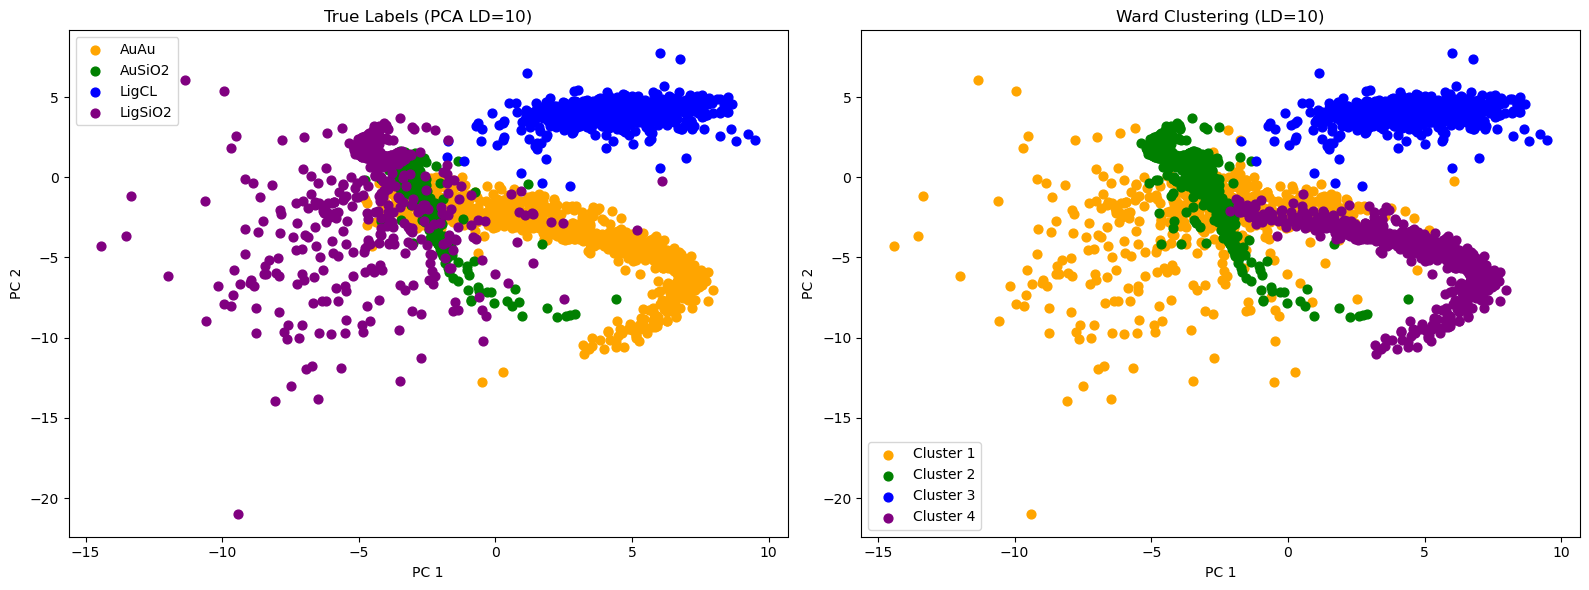

In [10]:
colors = ['orange', 'green', 'blue', 'purple']
label_to_color = dict(zip(label_names_10, colors))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6)) 

for label in label_names_10:
    mask = (np.array(labels_true_10) == label)
    ax1.scatter(ld10_pca[mask, 0], ld10_pca[mask, 1], 
                label=label, s=40, color=label_to_color[label])
ax1.set_title("True Labels (PCA LD=10)")
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.legend()

for cluster_id in np.unique(cluster_labels_10):
    mask = (cluster_labels_10 == cluster_id)
    ax2.scatter(ld10_pca[mask, 0], ld10_pca[mask, 1], 
                label=f"Cluster {cluster_id}", s=40, c=colors[cluster_id - 1])
ax2.set_title("Ward Clustering (LD=10)")
ax2.set_xlabel("PC 1")
ax2.set_ylabel("PC 2")
ax2.legend()

plt.tight_layout()
plt.show()

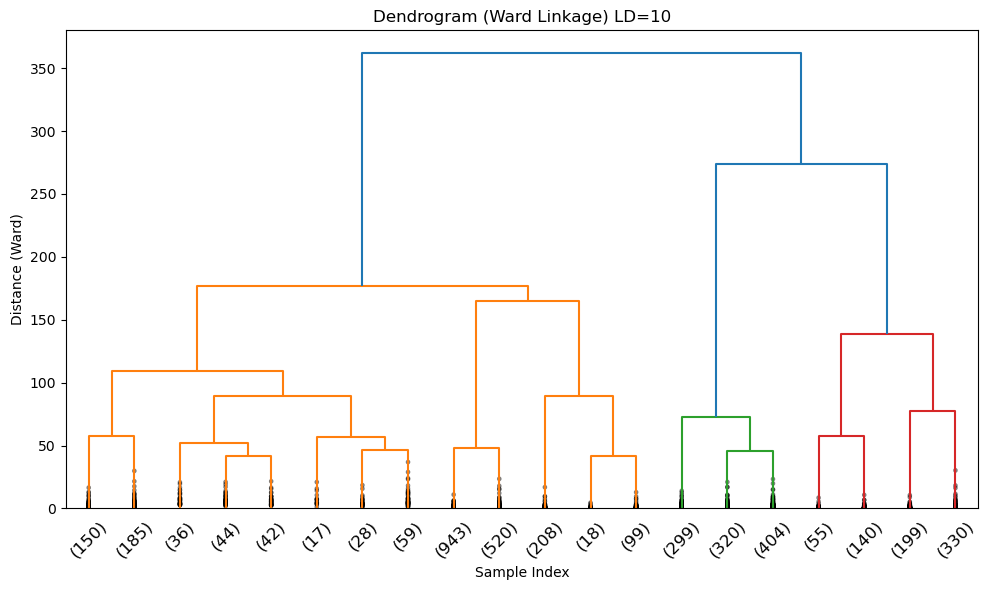

In [11]:
plt.figure(figsize=(10, 6))
dendrogram(
    linked_ld10, 
    truncate_mode='lastp',  
    p=20,                  
    leaf_rotation=45.,
    leaf_font_size=12.,
    show_contracted=True
)
plt.title('Dendrogram (Ward Linkage) LD=10')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.tight_layout()
plt.show()

In [12]:
cluster_encoder = LabelEncoder()
cluster_labels_num = cluster_encoder.fit_transform(cluster_labels_10)

ari_10 = adjusted_rand_score(y_true_10, cluster_labels_10)
homogeneity_10 = homogeneity_score(y_true_10, cluster_labels_10)
completeness_10 = completeness_score(y_true_10, cluster_labels_10)

print(f"Adjusted Rand Index (ARI):, {ari_10:.3f}")
print(f"Homogeneity: {homogeneity_10:.3f}")
print(f"Completeness: {completeness_10:.3f}")

Adjusted Rand Index (ARI):, 0.613
Homogeneity: 0.699
Completeness: 0.753
